In [53]:
import pandas as pd                                                    # For Data manipulation
import matplotlib.pyplot as plt                                        # For Data visualization
import numpy as np                                                     # used for working with arrays
import seaborn as sns                                                  # used for statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler                       # For feature scaling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans                                     # For K-Means clustering
import warnings                                                        # To ignore warnings
warnings.filterwarnings('ignore')

Fetching Datasets

In [54]:
df1 = pd.read_csv('/content/cleaned_EV_cars_India_2023.csv')
df1.head()

,Brand,Car_name,Car_price(lakhs),Batter_cap(KWH),Drive_range,Power,Charge_time,Seats,transmission,Top_speed(Kmph)
0,MG,MG Comet EV,7.98,17.30,230.0,41.42,7.00,5.0,Automatic,160.0
1,Tata,Tata Tiago EV,11.99,19.20,250.0,65.65,6.90,5.0,Automatic,110.0
2,Tata,Tata Tigor EV,13.75,26.00,315.0,73.75,7.50,5.0,Automatic,130.0
3,MG,MG ZS EV,27.40,50.30,461.0,174.33,8.59,5.0,Automatic,180.0
4,BYD,BYD Atto 3,34.49,60.48,521.0,201.15,9.50,4.0,Automatic,94.0


performing EDA

In [60]:
df1.dropna(inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             30 non-null     object 
 1   Car_name          30 non-null     object 
 2   Car_price(lakhs)  30 non-null     float64
 3   Batter_cap(KWH)   30 non-null     float64
 4   Drive_range       30 non-null     float64
 5   Power             30 non-null     float64
 6   Charge_time       30 non-null     float64
 7   Seats             30 non-null     float64
 8   transmission      30 non-null     object 
 9   Top_speed(Kmph)   30 non-null     float64
dtypes: float64(7), object(3)
memory usage: 2.6+ KB


In [61]:
df1.shape


(30, 10)

In [62]:
df1.describe()

,Car_price(lakhs),Batter_cap(KWH),Drive_range,Power,Charge_time,Seats,Top_speed(Kmph)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,67.236000,58.745333,426.166667,198.569333,7.798333,4.733333,167.000000
std,62.902975,39.519535,150.789665,168.447634,4.632903,0.449776,52.182703
min,4.500000,17.300000,230.000000,13.410000,1.500000,4.000000,40.000000
25%,17.640000,32.600000,316.250000,73.750000,6.000000,4.250000,130.000000
50%,42.225000,45.400000,401.500000,161.940000,7.000000,5.000000,185.000000
75%,114.875000,77.400000,485.000000,225.717500,8.567500,5.000000,200.000000
max,200.000000,200.000000,857.000000,750.970000,28.000000,5.000000,245.000000


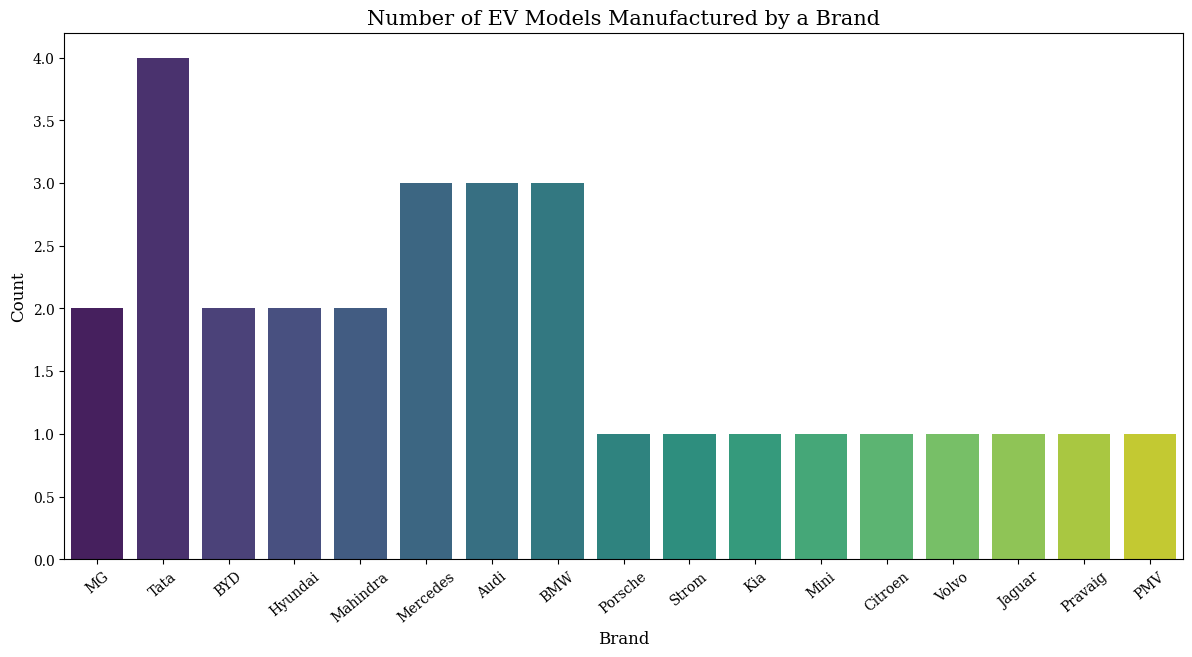

In [63]:
sns.catplot(data=df1, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

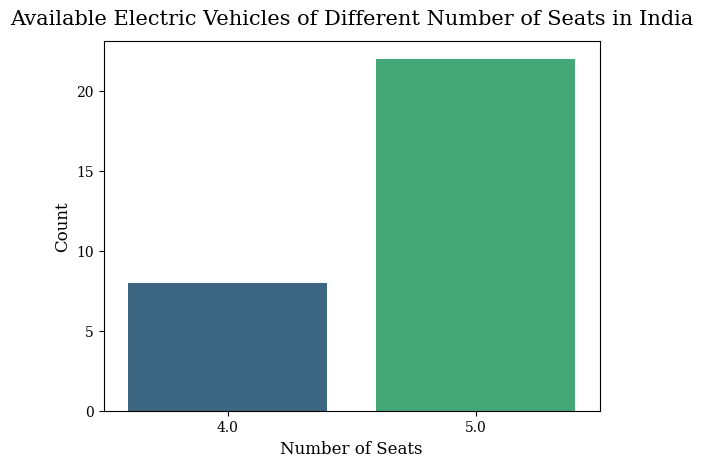

In [64]:
# EVs of different number of seats
sns.countplot(data=df1, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

Text(0.5, 1.0, 'Brand-wise Analysis of the Number of Seats')

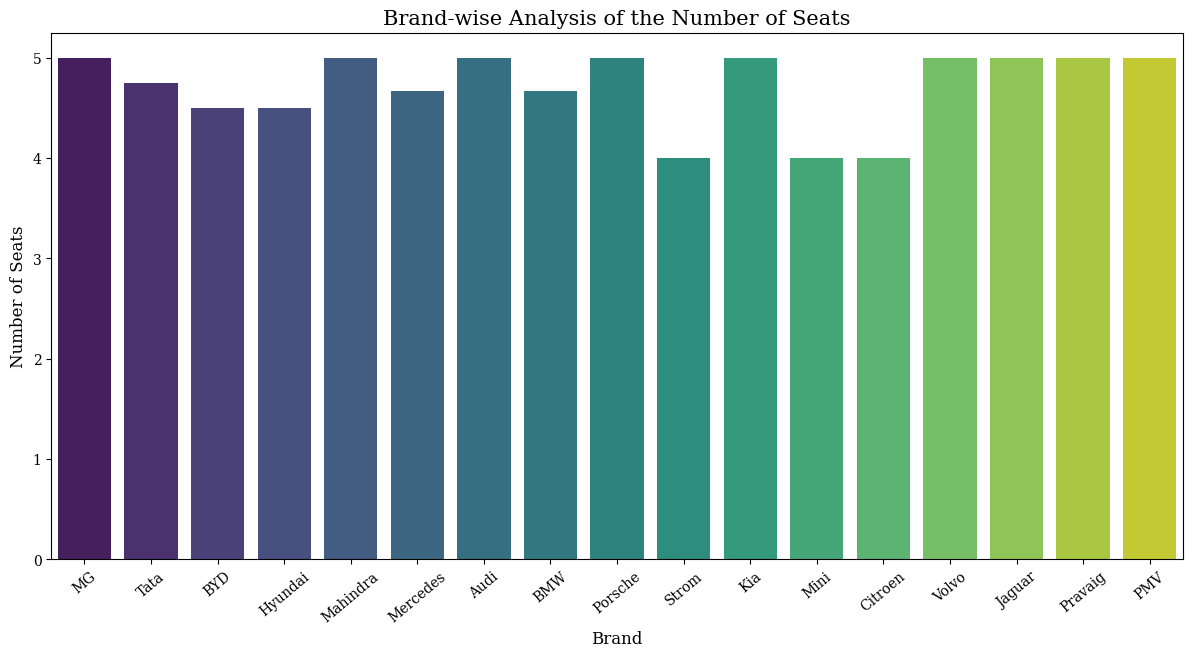

In [65]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15)


Text(0.5, 1.0, 'Price Comparison')

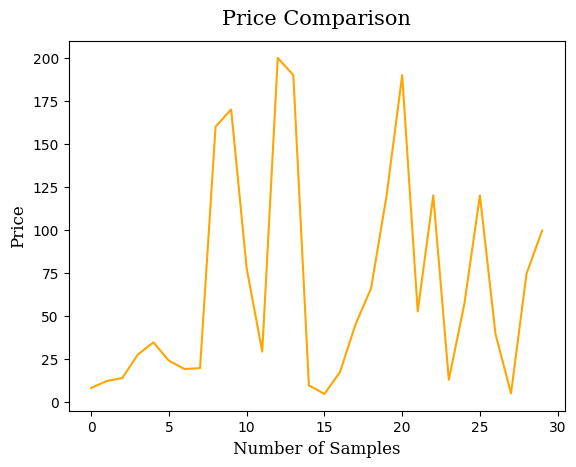

In [66]:
# plotting the price for cars
plt.plot(df1['Car_price(lakhs)'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12)

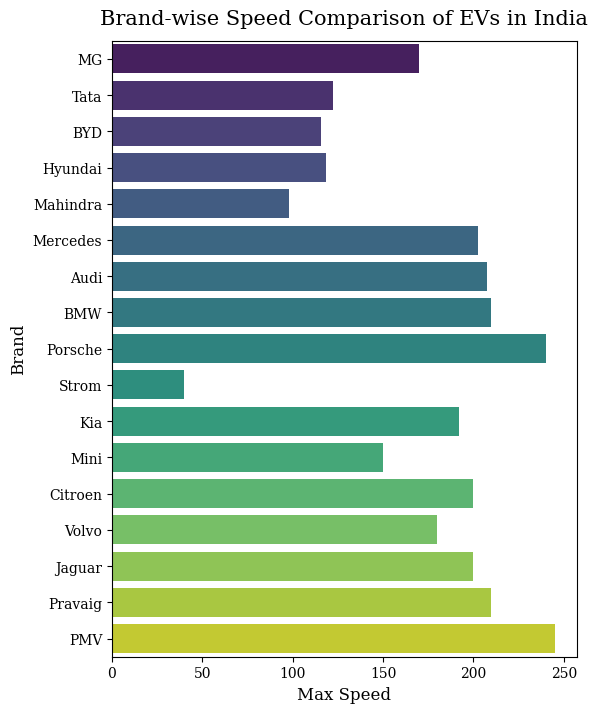

In [67]:
# speed visualization of datasets
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, x='Top_speed(Kmph)', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

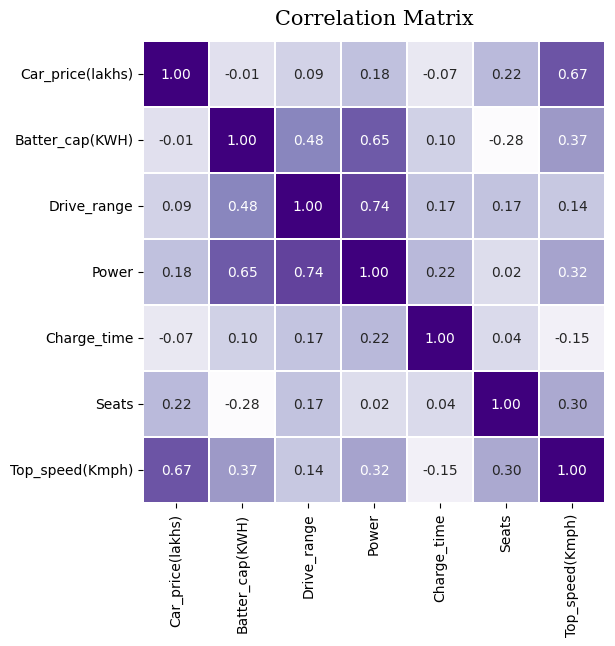

In [68]:
# plotting the correlation matrix
plt.figure(figsize=(6,6))
# Select only numerical columns for correlation calculation
numerical_df = df1.select_dtypes(include=['float', 'int'])
sns.heatmap(data=numerical_df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12)

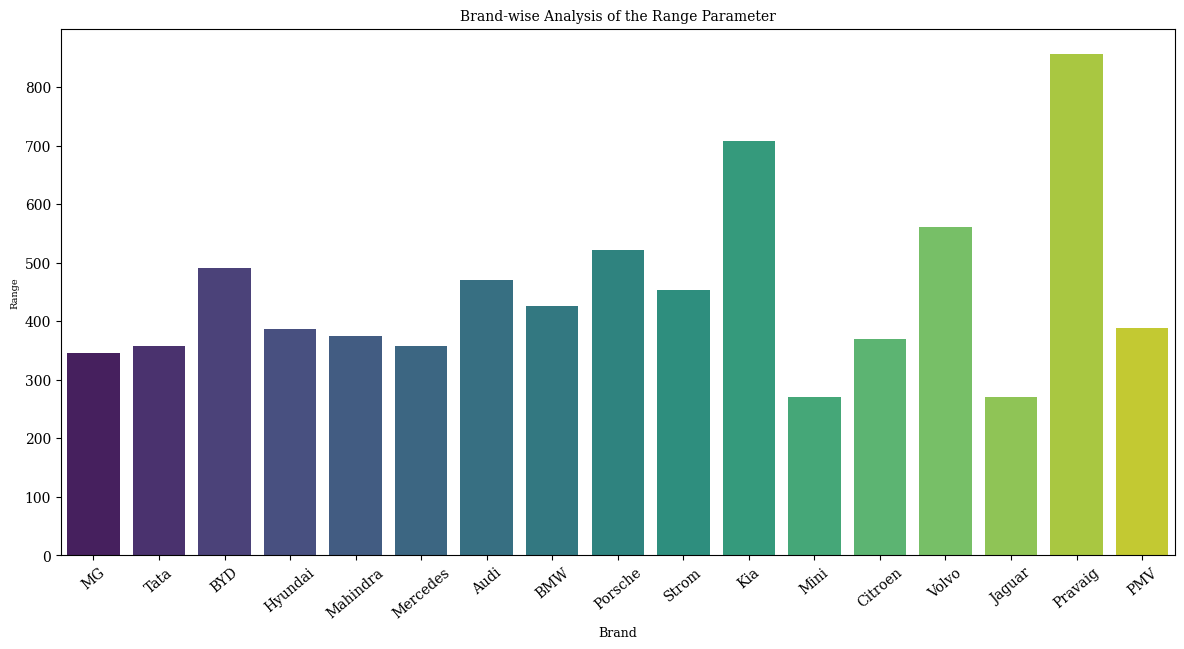

In [85]:
# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df1, x='Brand', y='Drive_range', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=9)
plt.ylabel('Range', family='serif', size=7)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=10);

**Segment Extraction**

Budget wise EV Car Analysis

In [70]:
PriceRange = (df1['Car_price(lakhs)'].astype(str))
df1

,Brand,Car_name,Car_price(lakhs),Batter_cap(KWH),Drive_range,Power,Charge_time,Seats,transmission,Top_speed(Kmph)
0,MG,MG Comet EV,7.98,17.30,230.0,41.42,7.00,5.0,Automatic,160.0
1,Tata,Tata Tiago EV,11.99,19.20,250.0,65.65,6.90,5.0,Automatic,110.0
2,Tata,Tata Tigor EV,13.75,26.00,315.0,73.75,7.50,5.0,Automatic,130.0
3,MG,MG ZS EV,27.40,50.30,461.0,174.33,8.59,5.0,Automatic,180.0
4,BYD,BYD Atto 3,34.49,60.48,521.0,201.15,9.50,4.0,Automatic,94.0
5,Hyundai,Hyundai Kona Electric,23.84,39.20,452.0,134.10,6.16,5.0,Automatic,107.0
6,Mahindra,Mahindra XUV400 EV,18.99,34.50,375.0,149.55,6.30,5.0,Automatic,86.0
7,Tata,Tata Nexon EV Max,19.49,40.50,453.0,141.04,6.00,5.0,Automatic,130.0
8,Mercedes,Mercedes-Benz EQS,160.00,17.30,230.0,41.42,7.00,5.0,Automatic,217.0
9,Audi,Audi e-tron GT,170.00,19.20,250.0,60.34,8.30,5.0,Automatic,233.0


In [79]:
mid_range_cars= df1.loc[df1['Car_price(lakhs)'] <=30]
high_range_cars= df1.loc[df1['Car_price(lakhs)'] >30]
s1 = ['Less than INR 30']
s2 = ['More than INR 30']

In [80]:
mid_range_cars

,Brand,Car_name,Car_price(lakhs),Batter_cap(KWH),Drive_range,Power,Charge_time,Seats,transmission,Top_speed(Kmph)
0,MG,MG Comet EV,7.98,17.3,230.0,41.42,7.00,5.0,Automatic,160.0
1,Tata,Tata Tiago EV,11.99,19.2,250.0,65.65,6.90,5.0,Automatic,110.0
2,Tata,Tata Tigor EV,13.75,26.0,315.0,73.75,7.50,5.0,Automatic,130.0
3,MG,MG ZS EV,27.40,50.3,461.0,174.33,8.59,5.0,Automatic,180.0
5,Hyundai,Hyundai Kona Electric,23.84,39.2,452.0,134.10,6.16,5.0,Automatic,107.0
6,Mahindra,Mahindra XUV400 EV,18.99,34.5,375.0,149.55,6.30,5.0,Automatic,86.0
7,Tata,Tata Nexon EV Max,19.49,40.5,453.0,141.04,6.00,5.0,Automatic,130.0
11,BYD,BYD E6,29.15,50.3,461.0,174.33,8.59,5.0,Automatic,137.0
14,Mahindra,Mahindra E Verito,9.46,34.5,375.0,50.00,11.30,5.0,Automatic,110.0
15,Strom,Strom Motors R3,4.50,40.5,453.0,141.04,15.00,4.0,Automatic,40.0


In [81]:
high_range_cars

,Brand,Car_name,Car_price(lakhs),Batter_cap(KWH),Drive_range,Power,Charge_time,Seats,transmission,Top_speed(Kmph)
4,BYD,BYD Atto 3,34.49,60.48,521.0,201.15,9.50,4.0,Automatic,94.0
8,Mercedes,Mercedes-Benz EQS,160.00,17.30,230.0,41.42,7.00,5.0,Automatic,217.0
9,Audi,Audi e-tron GT,170.00,19.20,250.0,60.34,8.30,5.0,Automatic,233.0
10,BMW,BMW i4,77.50,26.00,315.0,73.75,7.50,5.0,Automatic,190.0
12,Porsche,Porsche Taycan,200.00,60.48,521.0,201.15,9.50,5.0,Automatic,240.0
13,Audi,Audi RS e-tron GT,190.00,39.20,452.0,134.10,6.16,5.0,Automatic,200.0
17,Hyundai,Hyundai IONIQ 5,44.95,29.20,320.0,56.22,10.50,4.0,Automatic),130.0
18,Kia,Kia EV6,65.95,77.40,708.0,320.55,6.00,5.0,Automatic,192.0
19,BMW,BMW iX,120.00,111.50,372.0,321.84,7.25,4.0,Automatic,200.0
20,BMW,BMW i7,190.00,101.70,590.0,536.40,6.00,5.0,Automatic,239.0


Price - Range visuals

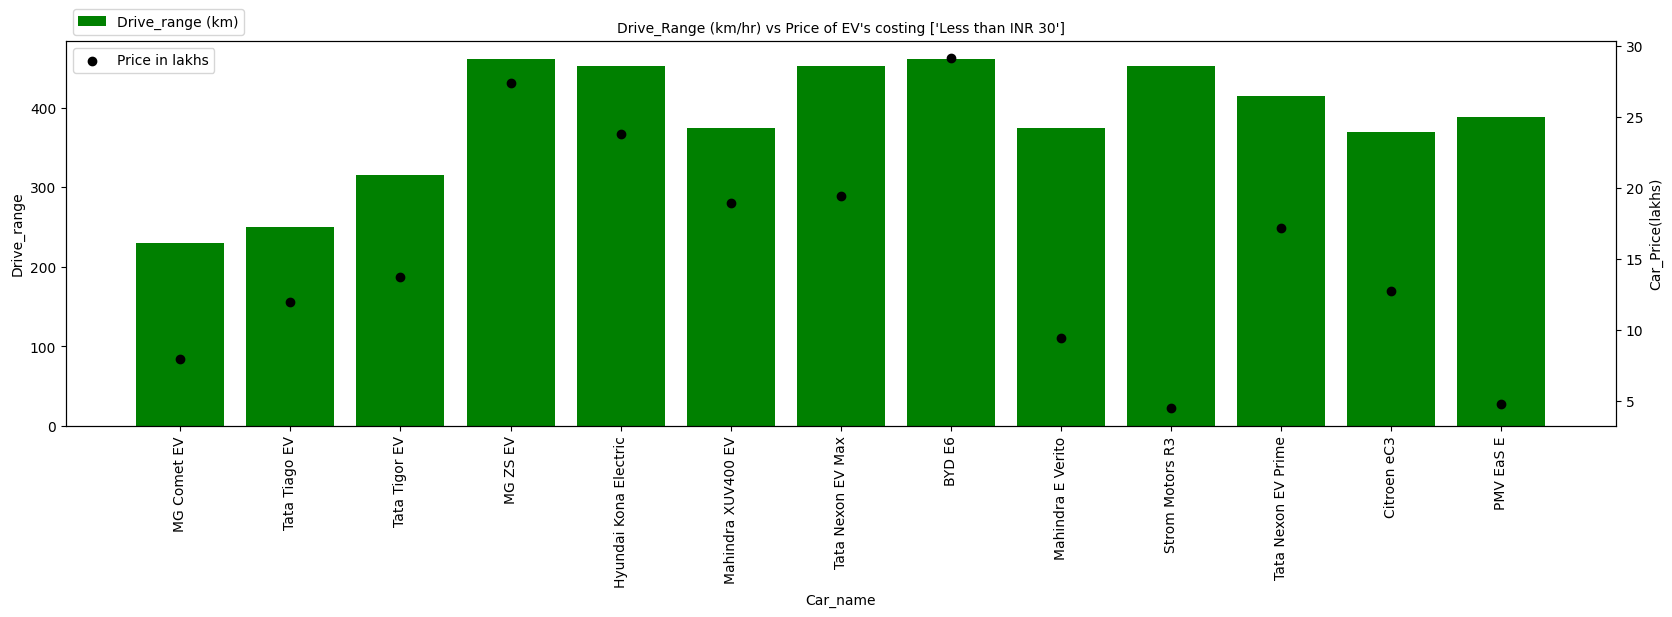

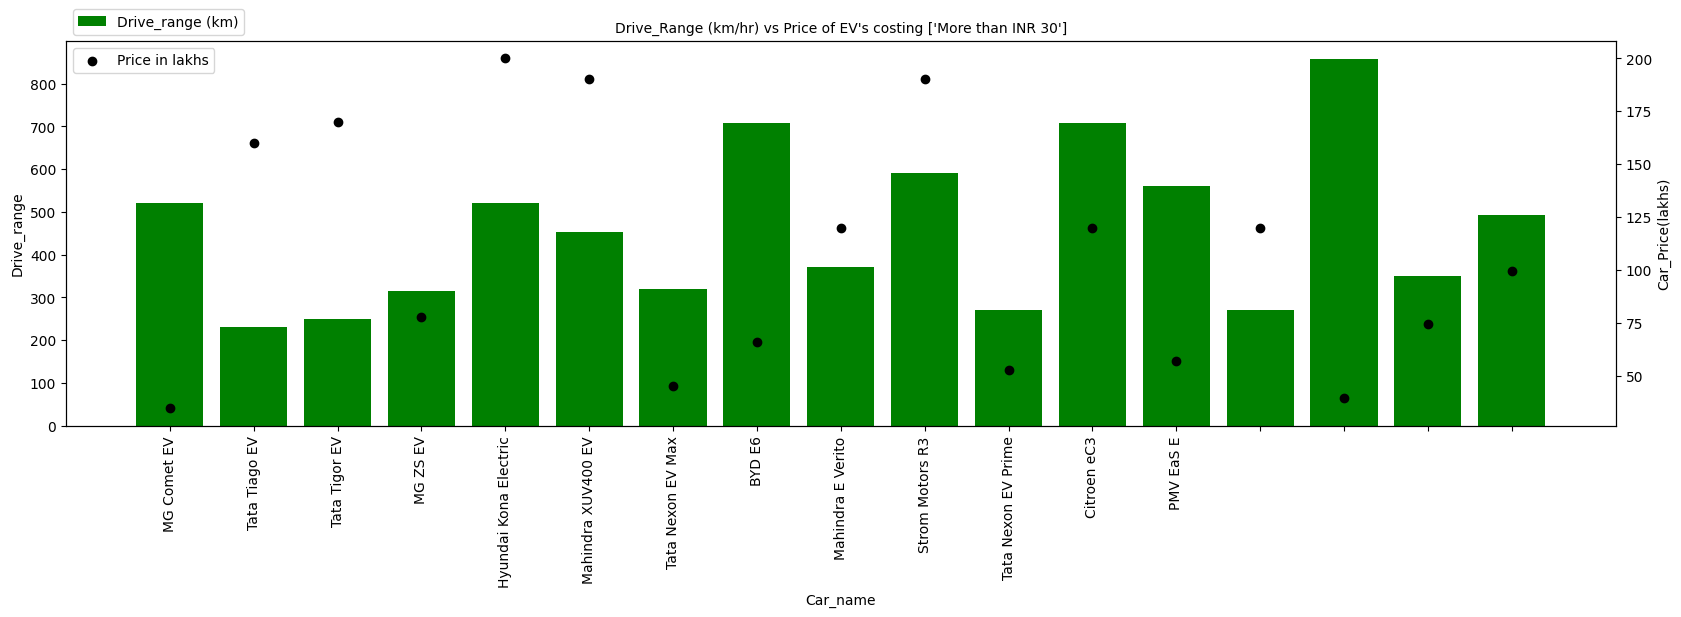

In [83]:
def pricerange(dataframe, text):
    plt.figure(figsize=(20,5))
    a_1 = plt.subplot()
    a_1.bar(dataframe['Car_name'], dataframe['Drive_range'], label='Drive_range (km)', color='green')
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,1.1))
    a_2 = a_1.twinx()
    a_2.scatter(dataframe['Car_name'], dataframe['Car_price(lakhs)'], label = 'Price in lakhs', color='black')
    plt.title('''Drive_Range (km/hr) vs Price of EV's costing {}'''.format(text), fontsize = 10)
    a_1.set_xlabel('Car_name')
    a_1.set_ylabel('Drive_range')
    a_2.set_ylabel('Car_Price(lakhs)')
    plt.legend(loc= 'upper left', bbox_to_anchor = (0,1))
    a_1.set_xticklabels(mid_range_cars['Car_name'], rotation = 'vertical')
    plt.show()
pricerange(mid_range_cars, s1)
pricerange(high_range_cars, s2)


Model Building Using K-Means Clusteing

In [34]:
# selecting features for building a model
X = df1[['Top_speed(Kmph)','Batter_cap(KWH)','Charge_time', 'Drive_range', 'Power', 'Seats', 'Car_price(lakhs)']]

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
X = df1[['Top_speed(Kmph)','Batter_cap(KWH)','Charge_time', 'Drive_range', 'Power', 'Seats', 'Car_price(lakhs)']]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now apply PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.199869,-0.553144,0.456478,-0.229582,0.955508,-0.458980,-0.354553
1,-2.425737,0.029922,0.697087,-0.466741,0.409215,-0.559616,0.339476
2,-1.861947,0.010882,0.741895,-0.464746,0.478463,-0.233025,0.052625
3,-0.073717,-0.014232,0.698826,-0.452706,0.602243,0.140271,-0.463178
4,-0.540317,2.243834,-0.418746,0.248741,-1.247290,0.404317,-0.066249


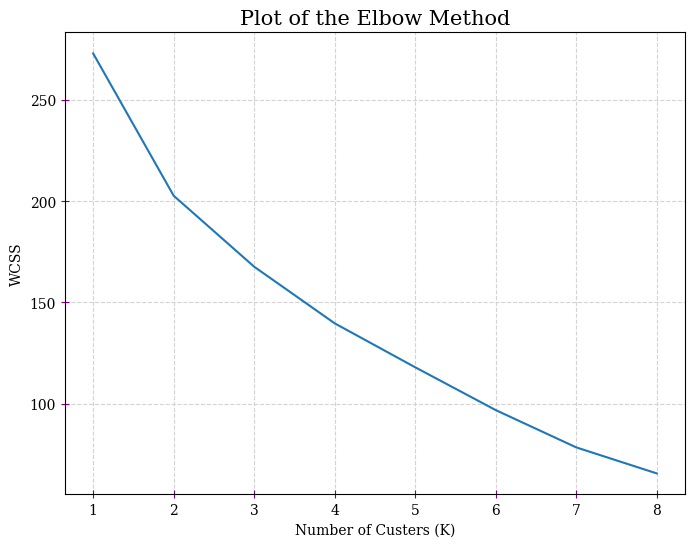

In [46]:
wcss = []

for i in range(1, 9):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=60)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 9), wcss)
plt.xticks(range(1, 9), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()


In [47]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=60)
kmean.fit(X_pca)
KMeans(n_clusters=4, random_state=60)


KMeans(n_clusters=4, random_state=60)

In [48]:
pd.Series(kmean.labels_).value_counts()

2    19
0     8
1     6
3     6
Name: count, dtype: int64

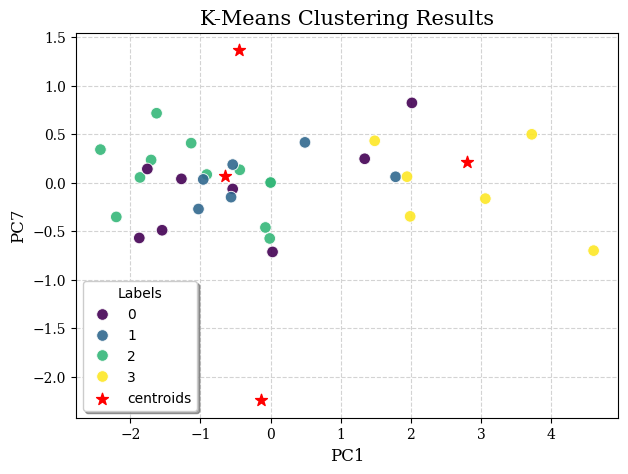

In [51]:
df1['clusters'] = kmean.labels_
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC7', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC7', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()
